# Task-01 Prediction Using Supervised ML

# Submitted by - Jayanta Kumar Pal

# Linear Regression With Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for Machine Learning can be used to implement simple limear regression involving two variables.

# Simple Linear Regression

Here we are going to predict the percentage of marks of a student based on the number of study hours

In [2]:
#Importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the scores dataset of student

In [3]:
url="http://bit.ly/w-data"
scr_data=pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


Printing the first 10 rows

In [5]:
# The head() retrieves the first 10 rows from the dataset
scr_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#To see other statistical details,we can use the describe() method
scr_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#Let's plot a 2D graph to visualize our dataset and see if we can manually find any relationship between the data.
#We can create the plot with the following code

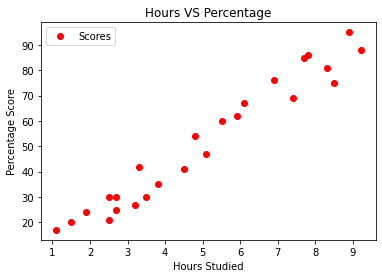

In [17]:
scr_data.plot(x='Hours',y='Scores',style='ro')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


From the graph,we can clearly see that there is a positive linear correlation between hours studied and percentage scored by the student

In [18]:
#Next we can divide the dataset for prediction
#we can divide it into attribute variable and target variable
#Attribute variable is Hours and target variable is Scores

# Preparing the dataset

In [19]:
X = scr_data.iloc[:, :-1].values  
y = scr_data.iloc[:, 1].values  

In [20]:
#Next step is to split the training and test dataset
#We can do this by using the train_test_split() method included in the Scikit-Learn's Library

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [23]:
#this splits data into 80% training phase and 20% test phase

# Training the dataset

In [24]:
#We have completed splitting of our dataset.Now we have to train our algorithm


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training Complete")

Training Complete


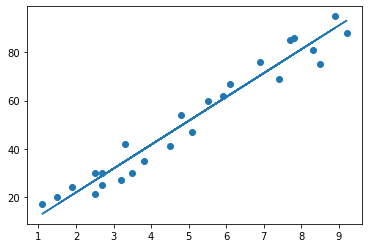

In [27]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making predictions

In [29]:
#Now that we have trained our algorithms,we have to make some predictions

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
#To compare the actual output values for X_test with the predicted values,execute the following code

In [32]:
scr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
scr 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the algorithm

In [33]:
#Here we can evaluate the performance of the algorithm

In [34]:
#For regression algorithms,three measures can be used
##Mean Absolute Error(MAE),Mean Squared Error(MSE),Root Mean Squared Error(RMSE)

In [39]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [40]:
# You can also test with some new data


Lets find the predicted score if a student studies for 9.25 hours/day

In [44]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


If a student studies for 9.25 hours per day,the model predicts the score of 93.69%